In [29]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [30]:
def DFT_filter(img,fc=.5):
    # This uses the CV2.DFT function

    if(len(img.shape)==2):
        # if grayscale, make it 3D anyway
        img=np.expand_dims(img,axis=2)


    img_filtered_color = np.zeros(img.shape)

    for cIdx in range(img.shape[2]):
    
        fourier = cv2.dft(np.float32(img[:,:,cIdx]), flags=cv2.DFT_COMPLEX_OUTPUT)
        # Shift the zero-frequency component to the center of the spectrum
        fourier_shift = np.fft.fftshift(fourier)
        
        filter_mask=np.zeros((fourier_shift.shape[0],fourier_shift.shape[1]))
        cx = filter_mask.shape[0]/2
        cy = filter_mask.shape[1]/2

        # I do not know, why (perhaps a bug in openCV, but you need to flip the X/Y order)
        cv2.ellipse(filter_mask,np.uint((cy,cx)),np.uint((cy*fc,cx*fc)),angle=0,startAngle=0,endAngle=360,color=255,thickness=-1)
       
        fourier_shift_filtered=np.zeros(fourier_shift.shape)
        fourier_shift_filtered[:,:,0] = fourier_shift[:,:,0]*filter_mask # Real part
        fourier_shift_filtered[:,:,1] = fourier_shift[:,:,1]*filter_mask # imaginay part
        
        fourier_filtered = np.fft.ifftshift(fourier_shift_filtered)
        img_filtered = cv2.idft(fourier_filtered)
            
        img_filtered_color[:,:,cIdx]=cv2.magnitude(img_filtered[:,:,0],img_filtered[:,:,1])

    if(img_filtered_color.shape[2]==1):
        # if it was grayscale, turn it back to that
        img_filtered_color=np.squeeze(img_filtered_color,axis=2)

    # Note, the flag "norm_type=cv2.NORM_MINMAX" is essential
    img_filtered_color = np.uint8(cv2.normalize(img_filtered_color,None,alpha=0,beta=255,norm_type=cv2.NORM_MINMAX))
    return img_filtered_color

In [31]:
def FFT_filter(img,fc=.5):
    # This uses the np.fft.fft2 function

    if(len(img.shape)==2):
        # if grayscale, make it 3D anyway
        img=np.expand_dims(img,axis=2)


    img_filtered_color = np.zeros(img.shape)

    for cIdx in range(img.shape[2]):
    
        fourier = np.fft.fft2(np.float32(img[:,:,cIdx]))
        # Shift the zero-frequency component to the center of the spectrum
        fourier_shift = np.fft.fftshift(fourier)
        
        filter_mask=np.zeros((fourier_shift.shape[0],fourier_shift.shape[1]))
        cx = filter_mask.shape[0]/2
        cy = filter_mask.shape[1]/2

        # I do not know, why (perhaps a bug in openCV, but you need to flip the X/Y order)
        cv2.ellipse(filter_mask,np.uint((cy,cx)),np.uint((cy*fc,cx*fc)),angle=0,startAngle=0,endAngle=360,color=255,thickness=-1)

        fourier_shift_filtered=np.zeros(fourier_shift.shape)

        # In the NP.FFT2, the matrix is complex (a+b*j) whereas in the cv2 DFT function
        # this is a 3D array [:,:,{real/imaginary}]
        fourier_shift_filtered = fourier_shift*filter_mask
        
        fourier_filtered = np.fft.ifftshift(fourier_shift_filtered)
        img_filtered = np.fft.ifft2(fourier_filtered)
            
        img_filtered_color[:,:,cIdx]=np.abs(img_filtered)

    if(img_filtered_color.shape[2]==1):
        # if it was grayscale, turn it back to that
        img_filtered_color=np.squeeze(img_filtered_color,axis=2)

    # Note, the flag "norm_type=cv2.NORM_MINMAX" is essential
    img_filtered_color = np.uint8(cv2.normalize(img_filtered_color,None,alpha=0,beta=255,norm_type=cv2.NORM_MINMAX))
    return img_filtered_color

In [32]:
img = cv2.imread(os.path.relpath('../../Data/ROC.png'))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Text(0.5, 1.0, 'Using NumPy FFT2')

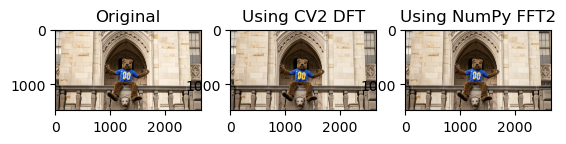

In [33]:
img_filt_CV=DFT_filter(img,.5)
img_filt_NP=FFT_filter(img,.5)

plt.subplot(131); plt.imshow(img); plt.title('Original')
plt.subplot(132); plt.imshow(img_filt_CV); plt.title('Using CV2 DFT')
plt.subplot(133); plt.imshow(img_filt_NP); plt.title('Using NumPy FFT2')
